In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

### 실습 1. 그래디언트 부스팅

#### Step 1. 데이터 구성하기 

In [2]:
df_raw = pd.read_csv('/home/piai/PABA_27/BigData/lecture/01 실습파일/2. Big Data 분석/통신고객이탈.csv')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    object 
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 109.1+ K

In [4]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (930, 15)

변수 :  Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')


In [5]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

- 결측치를 가진 변수가 없다. 

In [6]:
df_raw = df_raw.drop(columns=['CUSTOMER_ID'])
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [7]:
label_encoders = {}
for column in df_raw.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_raw[column] = label_encoders[column].fit_transform(df_raw[column])

df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,0,31,0,0,2,33.33,6,218,379.8,9,21.6,366,632.4
1,0,1,27,0,6,2,30.87,10,373,656.4,11,28.0,411,810.4
2,0,1,27,0,0,2,49.40,11,260,582.0,0,0.0,265,614.1
3,0,1,61,0,0,2,48.60,1,294,661.8,14,101.5,326,844.0
4,0,0,52,0,6,2,56.03,0,221,555.6,7,25.0,274,673.0


In [8]:
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (930, 13)
분할 후 설명변수 데이터 :Train (651, 13)   Test (279, 13)


In [10]:
display(df_raw.head(10))
display(df_raw_x.head(10))

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,0,31,0,0,2,33.33,6,218,379.8,9,21.6,366,632.4
1,0,1,27,0,6,2,30.87,10,373,656.4,11,28.0,411,810.4
2,0,1,27,0,0,2,49.40,11,260,582.0,0,0.0,265,614.1
3,0,1,61,0,0,2,48.60,1,294,661.8,14,101.5,326,844.0
4,0,0,52,0,6,2,56.03,0,221,555.6,7,25.0,274,673.0
5,0,1,51,0,7,2,49.43,3,289,486.6,1,31.8,427,903.3
6,0,0,30,0,0,2,32.30,6,427,729.6,12,52.8,490,907.2
7,0,1,36,0,0,2,54.87,2,522,801.6,0,0.0,558,884.7
8,0,0,43,0,6,2,11.23,0,156,516.6,8,84.0,362,987.6
9,0,0,50,0,0,2,49.97,0,136,466.2,13,31.8,186,632.7


,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,31,0,0,2,33.33,6,218,379.8,9,21.6,366,632.4
1,1,27,0,6,2,30.87,10,373,656.4,11,28.0,411,810.4
2,1,27,0,0,2,49.40,11,260,582.0,0,0.0,265,614.1
3,1,61,0,0,2,48.60,1,294,661.8,14,101.5,326,844.0
4,0,52,0,6,2,56.03,0,221,555.6,7,25.0,274,673.0
5,1,51,0,7,2,49.43,3,289,486.6,1,31.8,427,903.3
6,0,30,0,0,2,32.30,6,427,729.6,12,52.8,490,907.2
7,1,36,0,0,2,54.87,2,522,801.6,0,0.0,558,884.7
8,0,43,0,6,2,11.23,0,156,516.6,8,84.0,362,987.6
9,0,50,0,0,2,49.97,0,136,466.2,13,31.8,186,632.7


In [11]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET', 'USAGE_BAND',
       'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME',
       'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO',
       'TOTAL_CALLS_TIME'],
      dtype='object')

변수 :  Index(['GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET', 'USAGE_BAND',
       'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME',
       'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO',
       'TOTAL_CALLS_TIME'],
      dtype='object')


#### Step 2. 모델 생성 및 결론 도출 - 그래디언트 부스팅 

In [12]:
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.968
Accuracy on test set: 0.864


##### Parameter 조정 및 모델 평가 

In [13]:
# learning_rate 변화에 따른 모델 성능 
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

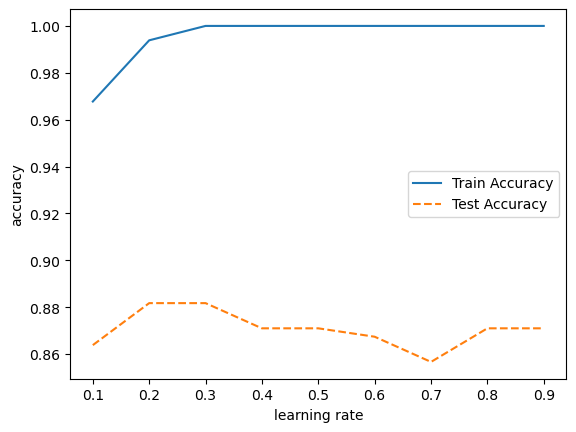

In [14]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

- 학습률이 증가하면 Train 모델의 정확도는 지속적으로 증가하나 Test 모델의 정확도는 94% 수준에서 변동한다. 
- Train 모델의 과적합 방지 등을 고려하여 0.3을 선택한다. 
- 학습률 0.1~0.3에서 세밀한 변화 확인이 필요하다. 

In [15]:
# 트리의 개수 변경에 따른 모델 성능 
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [16]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.826,0.867
1,20,0.894,0.889
2,30,0.900,0.885
3,40,0.905,0.885
4,50,0.917,0.885
5,60,0.939,0.875
6,70,0.943,0.875
7,80,0.955,0.867
8,90,0.959,0.867
9,100,0.968,0.864


In [ ]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

- 결정 트리 수 증가에 따라 모델의 정확도는 증가한다. 
- Train/Test 모델의 정확도 변화를 고려하여 120을 선택한다. 

In [18]:
# 최대 깊이 변경에 따른 모델 성능 
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [19]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.883,0.900
1,2,0.920,0.878
2,3,0.968,0.864
3,4,0.994,0.867
4,5,1.000,0.871
5,6,1.000,0.871
6,7,1.000,0.871
7,8,1.000,0.867
8,9,1.000,0.871
9,10,1.000,0.821


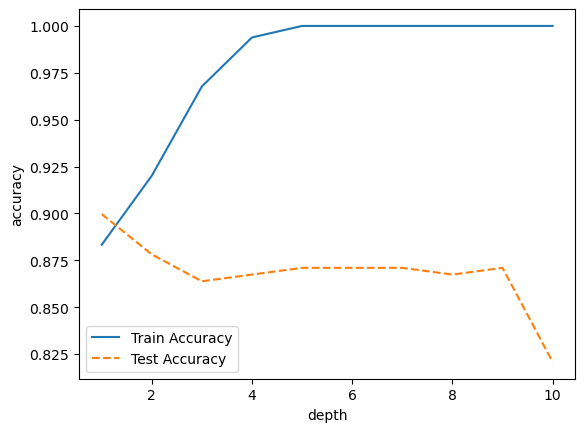

In [20]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

- 최대 깊이 증가에 따라 모델의 정확도는 증가한다. 
- 파라미터 특성과 Train/Test 모델의 정확도는 변화를 고려하여 6을 선택한다.

In [21]:
# 분리 노드의 최소 샘플 수 변경에 따른 모델 성능 
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [22]:
# min_samples_leaf별 정확도 
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.000,0.864
1,30,1.000,0.896
2,40,1.000,0.885
3,50,1.000,0.885
4,60,0.998,0.889
5,70,0.997,0.875
6,80,0.994,0.882
7,90,0.994,0.896
8,100,0.992,0.885


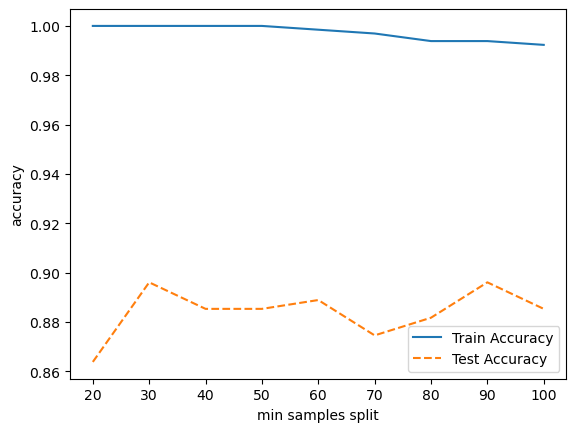

In [23]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

- 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소한다. 
- Train/Test 모델의 성능 변화가 거의 없어 (Train 1% 수준) 값을 지정하지 않는다. 

In [24]:
# 잎사귀 노드의 최소 샘플 수 변경에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [25]:
# min_samples_leaf별 정확도 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,1.000,0.896
1,10,1.000,0.875
2,15,1.000,0.889
3,20,1.000,0.885
4,25,0.998,0.875
5,30,0.995,0.871
6,35,0.989,0.864
7,40,0.988,0.878
8,45,0.983,0.867
9,50,0.982,0.867


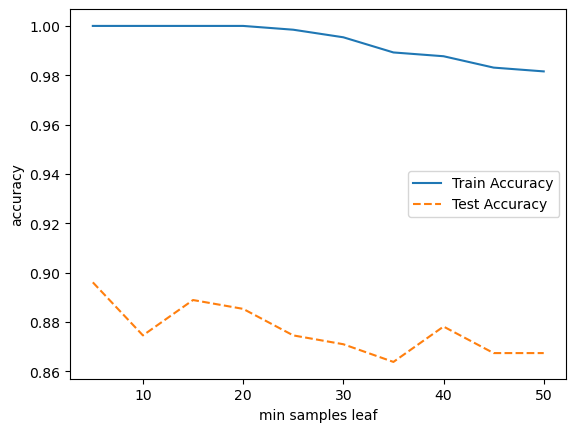

In [26]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

- 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소한다. 
- Train/Test 데이터의 성능 변화를 고려하여 30을 선택한다. 
- 10을 선택하면 Train/Test 모델의 성능 차이가 매우 크다. 

##### 결론 도출 

In [27]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100, learning_rate=0.1, 
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 0.889

Test Confusion matrix: 
[[221  14]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.929     0.940     0.934       235
           1      0.659     0.614     0.635        44

    accuracy                          0.889       279
   macro avg      0.794     0.777     0.785       279
weighted avg      0.886     0.889     0.887       279



- Train/Test 모델의 정확도가 다른 모델 대비 높은 수준이나 Train/Test 데이터 간 차이도 큰 편이다. 
- "255" 기준 F1-score는 66.7%이다. (다른 모델 대비 높은 편이다)(Precision은 높으나 Recall이 낮은 편이다)

In [28]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
3,HANDSET,0.388
6,DROPPED_CALLS,0.137
8,PEAK_CALLS_TIME,0.117
5,SERVICE_DURATION,0.089
12,TOTAL_CALLS_TIME,0.074
7,PEAK_CALLS_NO,0.041
1,AGE,0.039
11,TOTAL_CALLS_NO,0.035
10,WEEKEND_CALLS_TIME,0.032
9,WEEKEND_CALLS_NO,0.029


#### Step 3. 모델 생성 및 결론 도출 - XGBoost

##### Parameter 입력 및 모델 평가

In [38]:
%pip install xgboost|

/bin/bash: -c: line 1: syntax error: unexpected end of file
Note: you may need to restart the kernel to use updated packages.


In [39]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [40]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1234,
              reg_alpha=None, reg_lambda=None, ...)

In [41]:
print(df_train_y.unique())
print(df_raw_y.unique())
df_raw_y = df_raw_y.replace(255, 1)  # 255를 1로 변환

[0 1]
[0 1]


In [42]:
# 전체 데이터셋의 인덱스
indices = np.arange(len(df_raw_y))

# 임의로 인덱스를 섞음
np.random.shuffle(indices)

# 학습 데이터 인덱스와 테스트 데이터 인덱스 생성 (예: 80% 학습, 20% 테스트)
train_size = int(0.8 * len(indices))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

df_raw_y = df_raw_y.replace(255, 1)
df_train_y = df_raw_y[train_indices]
df_train_y = df_train_y.replace(255, 1)
print(df_train_y.unique())

[0 1]


In [ ]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)

In [ ]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))

In [ ]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

In [ ]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score) 

In [ ]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))

In [ ]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

##### 결론 도출 

### 실습 2. SVM(분류)

In [ ]:
columns_to_scale = ['SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 
                    'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME']

df_raw_x_to_scale = df_raw_x[columns_to_scale]
df_raw_x_others = df_raw_x.drop(columns=columns_to_scale)

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_to_scale)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=columns_to_scale)

df_x_converted = df_x_scaled.join(df_raw_x_others)

display("Scale 변환 전:", df_raw_x.head())
display("Scale 변환 후:", df_x_converted.head())

In [ ]:
columns_order = [
    'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET', 'USAGE_BAND',
    'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 
    'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 
    'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'
]

df_x_converted = df_x_converted[columns_order]

# 결과 확인
display("변환 후 열 순서 조정:", df_x_converted.head())

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

In [ ]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

In [ ]:
print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

In [ ]:
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

In [ ]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

##### Dummy 변환 및 Scale 조정 

#### Step 2. 모델 생성 

##### Parameter 조정 

##### 평가 

#### Step 3. 결론 도출 

### 실습 3. NN

### 실습 4. 모델 평가 